# HOMEWORK 9 - DIMENSIONAL REDUCTION

1. A short description of what is the dimensionality of the data and why and how to pick the dimensions for use.

Dimension Reduction refers to the process of converting a set of data having vast dimensions into data with lesser dimensions ensuring that it conveys similar information concisely. These techniques are typically used while solving machine learning problems to obtain better features for a classification or regression task[1].

The problem of unwanted increase in dimension is closely related to fixation of measuring / recording data at a far granular level then it was done in past. This is no way suggesting that this is a recent problem. It has started gaining more importance lately due to surge in data[2].

The need to reduce dimensionality is often associated with visualizations, reducing to 2–3 dimensions so we can plot it. But that is not always the case, sometimes we might value performance over precision so we could reduce 1000 dimensional data to 10 dimensions so we can manipulate it faster[1].

2.Initial Data setup

In [187]:
# first, we need to import the libraries and read data as CSV.
import os
import pandas as pd
import numpy as np
from numpy import *

In [188]:
!type Population.csv

Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Aruba,54211,55438,56225,56695,57032,57360,57715,58055,58386,58726,59063,59440,59840,60243,60528,60657,60586,60366,60103,59980,60096,60567,61345,62201,62836,63026,62644,61833,61079,61032,62149,64622,68235,72504,76700,80324,83200,85451,87277,89005,90853,92898,94992,97017,98737,100031,100832,101220,101353,101453,101669,102053,102577,103187,103795,104341,104822
Afghanistan,8996351,9166764,9345868,9533954,9731361,9938414,10152331,10372630,10604346,10854428,11126123,11417825,11721940,12027822,12321541,12590286,12840299,13067538,13237734,13306695,13248370,13053954,12749645,12389269,12047115,11783050,11601041,11502761,11540888,11777609,12249114,12993657,13981231,15095099,16172719,17099541,17822884,183

In [189]:
tv = pd.read_csv("Population.csv")
tv.head(5)   

Country Name       1960       1961       1962       1963       1964  \
0        Aruba    54211.0    55438.0    56225.0    56695.0    57032.0   
1  Afghanistan  8996351.0  9166764.0  9345868.0  9533954.0  9731361.0   
2       Angola  5643182.0  5753024.0  5866061.0  5980417.0  6093321.0   
3      Albania  1608800.0  1659800.0  1711319.0  1762621.0  1814135.0   
4      Andorra    13411.0    14375.0    15370.0    16412.0    17469.0   

        1965        1966        1967        1968     ...            2007  \
0    57360.0     57715.0     58055.0     58386.0     ...        101220.0   
1  9938414.0  10152331.0  10372630.0  10604346.0     ...      26616792.0   
2  6203299.0   6309770.0   6414995.0   6523791.0     ...      20997687.0   
3  1864791.0   1914573.0   1965598.0   2022272.0     ...       2970017.0   
4    18549.0     19647.0     20758.0     21890.0     ...         82683.0   

         2008        2009        2010        2011        2012        2013  \
0    101353.0    101453.0    101669.0    102053.0    102577.0    103187.0   
1  27294031.0  28004331.0  28803167.0  29708599.0  30696958.0  31731688.0   
2  21759420.0  22549547.0  23369131.0  24218565.0  25096150.0  25998340.0   
3   2947314.0   2927519.0   2913021.0   2905195.0   2900401.0   2895092.0   
4     83861.0     84462.0     84449.0     83751.0     82431.0     80788.0   

         2014        2015        2016  
0    103795.0    104341.0    104822.0  
1  32758020.0  33736494.0  34656032.0  
2  26920466.0  27859305.0  28813463.0  
3   2889104.0   2880703.0   2876101.0  
4     79223.0     78014.0     77281.0  

[5 rows x 58 columns]

In [190]:
tv.iloc[:,1:16].describe()

1960          1961          1962          1963          1964  \
count  2.600000e+02  2.600000e+02  2.600000e+02  2.600000e+02  2.600000e+02   
mean   1.182418e+08  1.198186e+08  1.219284e+08  1.245506e+08  1.272005e+08   
std    3.737219e+08  3.781663e+08  3.847073e+08  3.932191e+08  4.018010e+08   
min    4.279000e+03  4.453000e+03  4.566000e+03  4.656000e+03  4.748000e+03   
25%    5.184015e+05  5.301480e+05  5.426568e+05  5.559520e+05  5.684168e+05   
50%    3.669524e+06  3.734206e+06  3.839584e+06  3.955168e+06  4.074411e+06   
75%    2.532754e+07  2.611541e+07  2.690508e+07  2.770050e+07  2.847884e+07   
max    3.034193e+09  3.075115e+09  3.127961e+09  3.192794e+09  3.258201e+09   

               1965          1966          1967          1968          1969  \
count  2.600000e+02  2.600000e+02  2.600000e+02  2.600000e+02  2.600000e+02   
mean   1.299142e+08  1.327734e+08  1.356273e+08  1.385343e+08  1.415848e+08   
std    4.106115e+08  4.199926e+08  4.293272e+08  4.388758e+08  4.489104e+08   
min    4.841000e+03  4.936000e+03  5.033000e+03  5.161000e+03  5.303000e+03   
25%    5.727790e+05  5.786500e+05  5.882328e+05  6.257960e+05  6.567582e+05   
50%    4.170862e+06  4.235562e+06  4.300502e+06  4.367325e+06  4.449014e+06   
75%    2.924750e+07  2.999693e+07  3.059503e+07  3.120239e+07  3.179527e+07   
max    3.324952e+09  3.394865e+09  3.464440e+09  3.534821e+09  3.609384e+09   

               1970          1971          1972          1973          1974  
count  2.600000e+02  2.600000e+02  2.600000e+02  2.600000e+02  2.600000e+02  
mean   1.446832e+08  1.478565e+08  1.510035e+08  1.541343e+08  1.572740e+08  
std    4.591563e+08  4.696541e+08  4.800020e+08  4.902853e+08  5.005221e+08  
min    5.450000e+03  5.601000e+03  5.756000e+03  5.915000e+03  6.078000e+03  
25%    6.751030e+05  6.904992e+05  7.010858e+05  7.110462e+05  7.194410e+05  
50%    4.524351e+06  4.621619e+06  4.729008e+06  4.843972e+06  4.960820e+06  
75%    3.234670e+07  3.280830e+07  3.316809e+07  3.354369e+07  3.393224e+07  
max    3.684766e+09  3.762198e+09  3.838925e+09  3.914858e+09  3.991431e+09

3.Dimensional reduction process

In [191]:
data = pd.read_table("Population.csv", sep=',', header=None)
data.index.names = ['Country']
data.columns.names = ['Year']
data.head()

Year               0          1          2          3          4          5   \
Country                                                                        
0        Country Name     1960.0     1961.0     1962.0     1963.0     1964.0   
1               Aruba    54211.0    55438.0    56225.0    56695.0    57032.0   
2         Afghanistan  8996351.0  9166764.0  9345868.0  9533954.0  9731361.0   
3              Angola  5643182.0  5753024.0  5866061.0  5980417.0  6093321.0   
4             Albania  1608800.0  1659800.0  1711319.0  1762621.0  1814135.0   

Year            6           7           8           9      ...      \
Country                                                    ...       
0           1965.0      1966.0      1967.0      1968.0     ...       
1          57360.0     57715.0     58055.0     58386.0     ...       
2        9938414.0  10152331.0  10372630.0  10604346.0     ...       
3        6203299.0   6309770.0   6414995.0   6523791.0     ...       
4        1864791.0   1914573.0   1965598.0   2022272.0     ...       

Year             48          49          50          51          52  \
Country                                                               
0            2007.0      2008.0      2009.0      2010.0      2011.0   
1          101220.0    101353.0    101453.0    101669.0    102053.0   
2        26616792.0  27294031.0  28004331.0  28803167.0  29708599.0   
3        20997687.0  21759420.0  22549547.0  23369131.0  24218565.0   
4         2970017.0   2947314.0   2927519.0   2913021.0   2905195.0   

Year             53          54          55          56          57  
Country                                                              
0            2012.0      2013.0      2014.0      2015.0      2016.0  
1          102577.0    103187.0    103795.0    104341.0    104822.0  
2        30696958.0  31731688.0  32758020.0  33736494.0  34656032.0  
3        25096150.0  25998340.0  26920466.0  27859305.0  28813463.0  
4         2900401.0   2895092.0   2889104.0   2880703.0   2876101.0  

[5 rows x 58 columns]

In [192]:
import numpy as np
np_data = data.as_matrix()
np_data[0] 

array(['Country Name', 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0,
       1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0,
       1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0,
       1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0,
       1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0,
       1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0,
       2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0,
       2014.0, 2015.0, 2016.0], dtype=object)

Dimensionality Reduction with PCA

By using PCA we will be able to reduce the variables to just the two of them that best captures that information.

In order to do so, we will first how to perform PCA and plot the first two PCs in Python. We will close the section by analysing the resulting plot and each of the two PCs.

In [193]:
from sklearn.decomposition import PCA
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
a =le.fit_transform(data[0])
data[0]=a
data[0]

Country
0       51
1       10
2        0
3        5
4        1
5        4
6        7
7      250
8        8
9        9
10       3
11       6
12      11
13      12
14      13
15      32
16      19
17      21
18      31
19      16
20      30
21      15
22      14
23      25
24      18
25      20
26      22
27      24
28      27
29      17
      ... 
235    132
236    239
237    159
238    241
239    219
240    228
241    242
242    243
243    244
244    247
245    237
246    248
247    249
248    253
249    254
250    252
251    255
252    226
253    257
254     28
255    259
256    258
257    256
258    261
259    202
260    125
261    262
262    217
263    263
264    264
Name: 0, Length: 265, dtype: int64

In [194]:
data=data.head(50)

In [195]:
from sklearn.decomposition import PCA
from sklearn import preprocessing   
pca = PCA(n_components=2)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [196]:
 PCA(copy=True, n_components=2, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [197]:
#transform our data
data_2d = pca.transform(data)

In [198]:
#lower dimension representation of our data frame, as a numPy array
data_2d = pd.DataFrame(data_2d)
data_2d.index = data.index
data_2d.columns = ['PC1','PC2']
data_2d.head()

PC1           PC2
Country                            
0       -3.071941e+08 -1.110937e+07
1       -3.066313e+08 -1.108351e+07
2       -1.711790e+08  1.863189e+07
3       -1.993258e+08  1.876175e+07
4       -2.866152e+08 -1.296772e+07

In [199]:
#explained variance ratios
print(pca.explained_variance_ratio_)

[ 0.99746803  0.00249057]


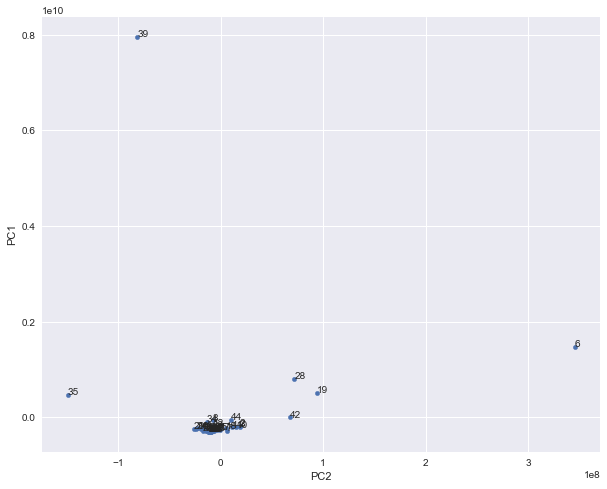

In [200]:
#lower dimensionality version of our dataset
%matplotlib inline
    
ax = data_2d.plot(kind='scatter', x='PC2', y='PC1', figsize=(10,8))
    
for i, location in enumerate(data.index):
    ax.annotate(
        location, 
        (data_2d.iloc[i].PC2,data_2d.iloc[i].PC1)
    )

In [201]:
#create a bubble chart, by setting the point size to a value proportional to the mean value for 
#all the years in that particular country. 
#First we need to add a new column containing the re-scaled mean per country across all the years.
from sklearn.preprocessing import normalize
    
data_2d['population_mean'] = pd.Series(data.mean(axis=1), index=data_2d.index)
population_mean_max = data_2d['population_mean'].max()
population_mean_min = data_2d['population_mean'].min()
population_mean_scaled = (data_2d.population_mean-population_mean_min) / population_mean_max
data_2d['population_mean_scaled'] = pd.Series(
        population_mean_scaled, 
        index=data_2d.index) 
data_2d.head()

PC1           PC2  population_mean  population_mean_scaled
Country                                                                     
0       -3.071941e+08 -1.110937e+07     1.954603e+03                0.000000
1       -3.066313e+08 -1.108351e+07     7.342440e+04                0.000068
2       -1.711790e+08  1.863189e+07     1.674665e+07                0.015896
3       -1.993258e+08  1.876175e+07     1.306317e+07                0.012399
4       -2.866152e+08 -1.296772e+07     2.653514e+06                0.002517

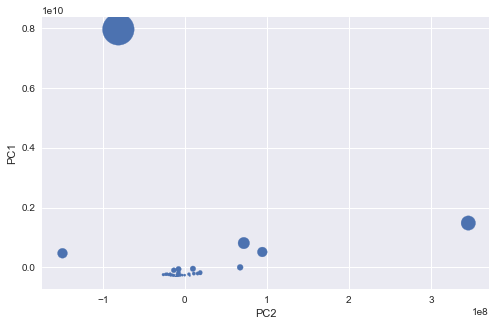

In [202]:
#To plot using this variable size.
data_2d.plot(
    kind='scatter', 
    x='PC2', 
    y='PC1', 
    s=data_2d['population_mean_scaled']*1000, 
    figsize=(8,5))

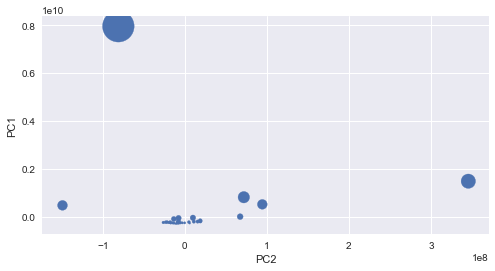

In [204]:
#Same with the sum instead of the mean
data_2d['population_sum'] = pd.Series(
    data.sum(axis=1), 
    index=data_2d.index)
population_sum_max = data_2d['population_sum'].max()
population_sum_min = data_2d['population_sum'].min()
population_sum_scaled =(data_2d.population_sum-population_sum_min) / population_sum_max
data_2d['population_sum_scaled'] = pd.Series(
        population_sum_scaled, 
        index=data_2d.index)
data_2d.plot(
    kind='scatter', 
    x='PC2', y='PC1', 
    s=data_2d['population_sum_scaled']*1000, 
    figsize=(8,4))

PCA RESULTS

From the plots we have done in Python and R, we can confirm that the most variation happens along the y axis, which we have assigned to PC1. We saw that the first PC already explains almost 99.7% of the variance, while the second one accounts for another 0.2%. At the very top of our charts we saw an important concentration of countries, most of them developed. While we descend that axis, the number of countries is more sparse, and they belong to less developed regions of the world.

# REFERENCES

1. https://www.analyticsvidhya.com/blog/2015/07/dimension-reduction-methods/                                       
2. https://en.wikipedia.org/wiki/Dimensionality_reduction                                               
3. https://www.codementor.io/jadianes/data-science-python-pandas-r-dimensionality-reduction-du1081aka
4. https://en.wikipedia.org/wiki/Principal_component_analysis
5. https://towardsdatascience.com/reducing-dimensionality-from-dimensionality-reduction-techniques-f658aec24dfe